In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, average_precision_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Set paths for dataset
dataset_dir = 'ham10000'
train_csv_path = 'KCDH2024_Training_GroundTruth.csv'
test_csv_path = 'KCDH2024_Test_GroundTruth.csv'
test_images_dir = 'KCDH2024_Test_Input'

# Load and preprocess data
def load_and_preprocess_data(csv_path, image_dir):
    df = pd.read_csv(csv_path)
    images = []
    labels = []
    for index, row in df.iterrows():
        img_path = os.path.join(image_dir, row['image'] + '.jpg')
        img = cv2.imread(img_path)
        img = cv2.resize(img, (128, 128))  # Resizing to 128x128 pixels
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = img / 255.0  # Normalization
        images.append(img)
        labels.append(row[1:].values)
    
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

# Load training data
X_train, y_train = load_and_preprocess_data(train_csv_path, dataset_dir)

# Convert labels to one-hot encoding
y_train = np.argmax(y_train, axis=1)
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)
datagen.fit(X_train)

# Build the model
# Build the CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=50,
    verbose=1
)

# Evaluate the model on validation data
val_preds = model.predict(X_val)
val_preds_labels = np.argmax(val_preds, axis=1)
val_true_labels = np.argmax(y_val, axis=1)

# Compute evaluation metrics
val_accuracy = accuracy_score(val_true_labels, val_preds_labels)
val_auc = roc_auc_score(y_val, val_preds, multi_class='ovr')
val_f1 = f1_score(val_true_labels, val_preds_labels, average='macro')
val_map = average_precision_score(y_val, val_preds, average='macro')

print(f'Validation Accuracy: {val_accuracy}')
print(f'Validation AUC: {val_auc}')
print(f'Validation F1 Score: {val_f1}')
print(f'Validation Mean Average Precision: {val_map}')



C:\Users\INP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 63, 63, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,306,439 (12.61 MB)

 Trainable params: 3,305,991 (12.61 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/50


C:\Users\INP\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 41s 154ms/step - accuracy: 0.5917 - loss: 1.5367 - val_accuracy: 0.6645 - val_loss: 1.6500
Epoch 2/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 39s 154ms/step - accuracy: 0.6587 - loss: 1.0404 - val_accuracy: 0.6705 - val_loss: 0.9882
Epoch 3/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 39s 156ms/step - accuracy: 0.6600 - loss: 0.9768 - val_accuracy: 0.7084 - val_loss: 0.8727
Epoch 4/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 40s 156ms/step - accuracy: 0.6656 - loss: 0.9520 - val_accuracy: 0.7119 - val_loss: 0.7681
Epoch 5/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 39s 155ms/step - accuracy: 0.6703 - loss: 0.8991 - val_accuracy: 0.7209 - val_loss: 0.7465
Epoch 6/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 40s 156ms/step - accuracy: 0.6808 - loss: 0.8899 - val_accuracy: 0.7279 - val_loss: 0.7968
Epoch 7/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 40s 159ms/step - accuracy: 0.6839 - loss: 0.8980 - val_accuracy: 0.7164 - val_loss: 0.7781
Epoch 8/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 39s 155ms/step - accuracy: 0.6939 - loss: 0.8675 - val

ValueError: unknown format is not supported

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
Test Accuracy: 0.6825396825396826
Test AUC: 0.8922527069977184
Test F1 Score: 0.3888138387197878
Test Mean Average Precision: 0.49472876203025784


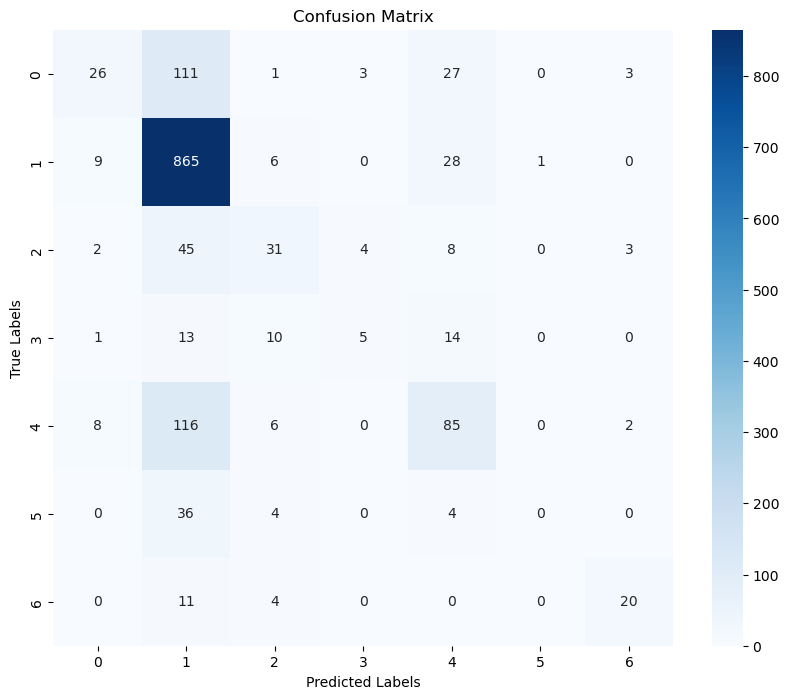

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Ensure y_test is one-hot encoded
y_test = np.argmax(y_test, axis=1)
lb = LabelBinarizer()
y_test = lb.fit_transform(y_test)

# Predict on test data
test_preds = model.predict(X_test)

# Convert predicted probabilities to labels
test_preds_labels = np.argmax(test_preds, axis=1)
test_true_labels = np.argmax(y_test, axis=1)

# Compute test metrics
test_accuracy = accuracy_score(test_true_labels, test_preds_labels)
test_auc = roc_auc_score(y_test, test_preds, multi_class='ovr')
test_f1 = f1_score(test_true_labels, test_preds_labels, average='macro')
test_map = average_precision_score(y_test, test_preds, average='macro')

print(f'Test Accuracy: {test_accuracy}')
print(f'Test AUC: {test_auc}')
print(f'Test F1 Score: {test_f1}')
print(f'Test Mean Average Precision: {test_map}')

# Get confusion matrix
conf_matrix = confusion_matrix(test_true_labels, test_preds_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=lb.classes_, yticklabels=lb.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
